In [363]:
import pandas as pd
import numpy as np

In [364]:
df_cell = pd.read_csv("cell_samples.csv")
df_cell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [365]:
df_cell['Class'].replace(2,0)

0      0
1      0
2      0
3      0
4      0
5      4
6      0
7      0
8      0
9      0
10     0
11     0
12     4
13     0
14     4
15     4
16     0
17     0
18     4
19     0
20     4
21     4
22     0
23     4
24     0
25     4
26     0
27     0
28     0
29     0
      ..
669    4
670    4
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    4
681    4
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    4
692    0
693    0
694    0
695    0
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [368]:
df_cell['Class'] = df_cell['Class'].replace(2,0)

In [370]:
df_cell['Class'] = df_cell['Class'].replace(4,1)

In [27]:
df_cell.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [28]:
#Data cleaning
df_cell = df_cell[pd.to_numeric(df_cell['BareNuc'], errors='coerce').notnull()]
df_cell['BareNuc'] = df_cell["BareNuc"].astype('int64')
df_cell.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

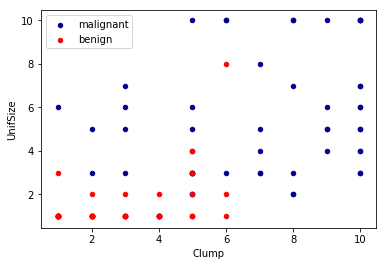

In [29]:
#Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

ax = df_cell[df_cell['Class']==4][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="malignant");
df_cell[df_cell['Class']==2][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="Red", label="benign", ax=ax);
plt.show

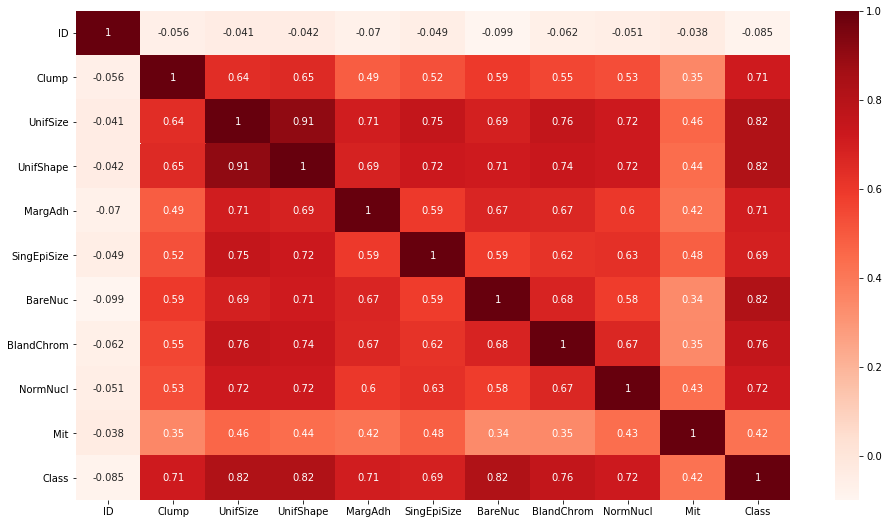

In [30]:
#Visualisasi Data

import seaborn as sns
corr = df_cell.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# SVM

In [7]:
#Apply Machine learning
from sklearn.model_selection import train_test_split

Features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl']
x = df_cell[Features]
y = df_cell['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

sv_clf = SVC(kernel='rbf')
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)

sv_clf_acc

0.9562043795620438

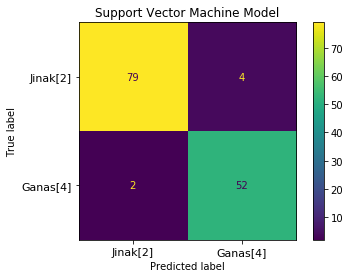

In [27]:
plot_confusion_matrix(sv_clf, x_test, y_test)
plt.title("Support Vector Machine Model")
plt.xticks(range(2), ['Jinak[2]', 'Ganas[4]'], fontsize=11)
plt.yticks(range(2), ['Jinak[2]', 'Ganas[4]'], fontsize=11)
plt.show()

In [52]:
#Hasil prediksi vs Ground truth indeks ke 0 - 5
print("Prediction:   ", sv_clf_pred[0:30], "\nGround Truth: ", np.asarray(y_test[0:30]))

Prediction:    [4 4 2 4 2 2 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4] 
Ground Truth:  [4 4 2 4 2 2 2 2 2 4 2 2 2 2 4 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4]


# Deep Learning

In [371]:
#Apply Machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Features = ['Clump', 'UnifSize'] #, 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl']
x = df_cell[Features].values
y = df_cell['Class'].values

In [372]:
MinMaxScaler = preprocessing.MinMaxScaler()
x_scale = MinMaxScaler.fit_transform(x)
#y_scale = MinMaxScaler.fit_transform(y)

In [373]:
x_scale

array([[0.44444444, 0.        ],
       [0.44444444, 0.33333333],
       [0.22222222, 0.        ],
       ...,
       [0.44444444, 1.        ],
       [0.33333333, 0.77777778],
       [0.33333333, 0.77777778]])

In [374]:
x_train, x_test_and_val, y_train, y_test_and_val = train_test_split(x_scale, y, test_size = 0.3)

In [375]:
x_val, x_test, y_val, y_test = train_test_split(x_test_and_val, y_test_and_val, test_size=0.5)

In [376]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adamax
from keras.layers import Dropout
from keras import regularizers

In [377]:
model = Sequential([Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(2,)), Dropout(0.3), Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'), Dropout(0.3), Dense(1, kernel_regularizer=regularizers.l2(0.01), activation='sigmoid'),])

In [378]:
opt = adamax(lr=0.00001, decay=1e-6)

In [379]:
def percentage_difference(y_true, y_pred):
    return K.mean(abs(y_pred/y_true - 1) * 100)

In [382]:

model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [383]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Train on 489 samples, validate on 105 samples
Epoch 1/100
489/489 [==============================] - 3s 6ms/step - loss: 1.0710 - acc: 0.5746 - val_loss: 1.0677 - val_acc: 0.7429
Epoch 2/100
489/489 [==============================] - 0s 192us/step - loss: 1.0689 - acc: 0.5665 - val_loss: 1.0672 - val_acc: 0.7429
Epoch 3/100
489/489 [==============================] - 0s 194us/step - loss: 1.0672 - acc: 0.5767 - val_loss: 1.0667 - val_acc: 0.7429
Epoch 4/100
489/489 [==============================] - 0s 213us/step - loss: 1.0631 - acc: 0.6237 - val_loss: 1.0662 - val_acc: 0.7429
Epoch 5/100
489/489 [==============================] - 0s 190us/step - loss: 1.0707 - acc: 0.5685 - val_loss: 1.0657 - val_acc: 0.7429
Epoch 6/100
489/489 [==============================] - 0s 176us/step - loss: 1.0653 - acc: 0.5910 - val_loss: 1.0652 - val_acc: 0.7429
Epoch 7/100
489/489 [==============================] - 0s 202us/step - loss: 1.0660 - acc: 0.5992 - val_loss: 1.0646 - val_acc: 0.7429
Epoch 8/100

Epoch 61/100
489/489 [==============================] - 0s 121us/step - loss: 1.0415 - acc: 0.6258 - val_loss: 1.0395 - val_acc: 0.7333
Epoch 62/100
489/489 [==============================] - 0s 151us/step - loss: 1.0415 - acc: 0.6135 - val_loss: 1.0390 - val_acc: 0.7333
Epoch 63/100
489/489 [==============================] - 0s 139us/step - loss: 1.0379 - acc: 0.6564 - val_loss: 1.0386 - val_acc: 0.7333
Epoch 64/100
489/489 [==============================] - 0s 121us/step - loss: 1.0401 - acc: 0.6299 - val_loss: 1.0381 - val_acc: 0.7333
Epoch 65/100
489/489 [==============================] - 0s 141us/step - loss: 1.0420 - acc: 0.6094 - val_loss: 1.0377 - val_acc: 0.7333
Epoch 66/100
489/489 [==============================] - 0s 235us/step - loss: 1.0408 - acc: 0.6319 - val_loss: 1.0372 - val_acc: 0.7333
Epoch 67/100
489/489 [==============================] - 0s 198us/step - loss: 1.0385 - acc: 0.6360 - val_loss: 1.0368 - val_acc: 0.7333
Epoch 68/100
489/489 [==========================

In [298]:
model.evaluate(x_test, y_test)[1]

103/103 [==============================] - 0s 87us/step


0.0

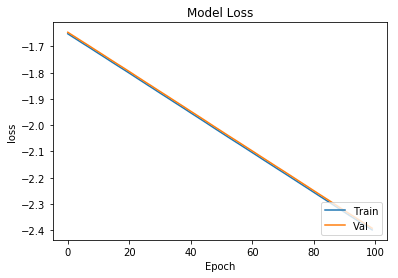

In [299]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

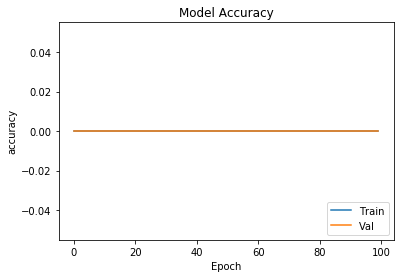

In [300]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()